In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras.models import Sequential

C:\Users\Aishwarya Tandel\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

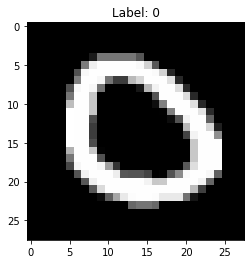

In [4]:
# Training data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

# Test data
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

# Choose a random sample
index = np.random.randint(0, len(train_images))

# Display the image and its label
plt.imshow(train_images[index], cmap='gray')
plt.title(f"Label: {train_labels[index]}")
plt.show()

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same'))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(14, 14, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='same'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(7, 7, 1)))
model.add(tf.keras.layers.Flatten(input_shape=(7, 7, 1)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 flatten_2 (Flatten)         (None, 15488)            

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
print(model.summary())


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 14, 14, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 flatten_15 (Flatten)        (None, 1568)            

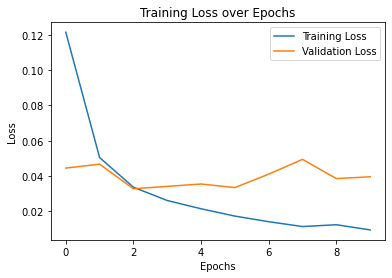

In [9]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

# Train the model and obtain history
#history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Plot training loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.0396 - acc: 0.9916


[0.03964175283908844, 0.991599977016449]